This Dataset contains information about car sales in Armenia, you need to predict the price of car, data taken from list.am website.

**Here about the description of the columns:**

**Car Name**: The name or model of the car.

**Year**: The manufacturing year of the car.

**Region**: The geographical area where the car is being sold or was registered

**FuelType**: The type of fuel the car uses.

**Mileage**: The total distance the car has traveled, typically measured in miles or kilomete

**Price**: The selling price of the car, usually in the local currency.

**Source Data** : https://www.kaggle.com/datasets/gorororororo23/armenian-market-cars-prediction

# Import Data

In [20]:
# Load dataset
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Nazifatul-Fadhilah/Data/main/Armenian%20Market%20Car%20Prices.csv")

# EDA

In [21]:
df.shape

(7995, 6)

In [22]:
df.head()

,Car Name,Year,Region,FuelType,Mileage,Price
0,Ford Transit,2002,Goris,Diesel,215000,12000
1,Ford Focus,2017,Ijevan,Gasoline,72000,11500
2,Opel Vectra,1998,Armavir,Gasoline,466000,4000
3,Mazda 6,2020,Nor Nork,Gasoline,100000,22000
4,Opel Vectra,1998,Armavir,Gasoline,318000,3500


In [23]:
df.tail()

,Car Name,Year,Region,FuelType,Mileage,Price
7990,VAZ (Lada) 2121 (4x4),2013,Armavir,Gasoline,150000,35000
7991,Toyota 4Runner,2018,Nor Nork,Gasoline,94000,5600
7992,Opel Astra hatchback,2001,Ajapnyak,Gasoline,151000,9800
7993,Toyota Camry,2009,Shengavit,Gasoline,300000,4500
7994,Mercedes-Benz C-Class,1997,Nor Geghi,Gasoline,200000,3200


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7995 entries, 0 to 7994
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Car Name  7995 non-null   object
 1   Year      7995 non-null   int64 
 2   Region    7995 non-null   object
 3   FuelType  7995 non-null   object
 4   Mileage   7995 non-null   int64 
 5   Price     7995 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 374.9+ KB


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7995.0,2010.342089,9.113848,1943.0,2004.0,2011.0,2018.0,2024.0
Mileage,7995.0,146401.523327,108371.306576,10.0,60000.0,130000.0,210000.0,1000000.0
Price,7995.0,15555.002877,17731.598604,200.0,6000.0,11500.0,19000.0,565000.0


In [26]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Car Name,7995,766,Toyota Camry,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7995.0,NaN,NaN,NaN,2010.342089,9.113848,1943.0,2004.0,2011.0,2018.0,2024.0
Region,7995,195,Kentron,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FuelType,7995,4,Gasoline,7326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7995.0,NaN,NaN,NaN,146401.523327,108371.306576,10.0,60000.0,130000.0,210000.0,1000000.0
Price,7995.0,NaN,NaN,NaN,15555.002877,17731.598604,200.0,6000.0,11500.0,19000.0,565000.0


In [27]:
print('The number of empty data is',df.isnull().sum().sum())

The number of empty data is 0


In [28]:
print('The number of duplicated data is',df.duplicated().sum())

The number of duplicated data is 9


In [29]:
# Delete the car name column because it has no effect
df.drop('Car Name',axis=1,inplace=True)
print(df.head())

   Year    Region  FuelType  Mileage  Price
0  2002     Goris    Diesel   215000  12000
1  2017    Ijevan  Gasoline    72000  11500
2  1998   Armavir  Gasoline   466000   4000
3  2020  Nor Nork  Gasoline   100000  22000
4  1998   Armavir  Gasoline   318000   3500


# Preprocessing Data

In [30]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler


In [31]:
# convert object data into numeric data
LE = LabelEncoder()
df['FuelType'] = LE.fit_transform(df['FuelType'])
print(LE.classes_)
print(np.sort(df['FuelType'].unique()))

df['Region'] = LE.fit_transform(df['Region'])
print(LE.classes_)
print(np.sort(df['Region'].unique()))

['Diesel' 'Electric' 'Gasoline' 'Hybrid']
[0 1 2 3]
['Abovian' 'Agarak' 'Agarakavan' 'Aghavnatun' 'Aghveran' 'Ajapnyak'
 'Akhuryan' 'Aknalich' 'Akunk' 'Alapars' 'Alaverdi' 'Amasia' 'Antaramut'
 'Aparan' 'Arabkir' 'Aragats' 'Aragatsavan' 'Aragyugh' 'Aramus' 'Ararat'
 'Arbat' 'Argavand' 'Argel' 'Arinj' 'Armavir' 'Arshaluys' 'Artashat'
 'Artik' 'Arzakan' 'Arzni' 'Ashotsk' 'Ashtarak' 'Astghadzor' 'Avan'
 'Avshar' 'Aygavan' 'Aygehovit' 'Aygevan' 'Ayntap' 'Baghramyan'
 'Balahovit' 'Bazum' 'Berd' 'Berdashen' 'Bjni' 'Byurakan' 'Byureghavan'
 'Chambarak' 'Charentsavan' 'China' 'Chiva' 'Dashtavan' 'Davtashen'
 'Dilijan' 'Dsegh' 'Dvin' 'Dzoraghbyur' 'Echmiadzin' 'Erebuni' 'Gai'
 'Garni' 'Gavar' 'Geghanist' 'Georgia' 'Germany' 'Getapnya' 'Getargel'
 'Ghazanchi' 'Ghukasavan' 'Ghursali' 'Goght' 'Goris' 'Griboyedov'
 'Gyulagarak' 'Gyumri' 'Hartagyugh' 'Hayanist' 'Haykashen' 'Horom'
 'Hovtashat' 'Hrazdan' 'Hushakert' 'Ijevan' 'Janfida' 'Jermuk' 'Jrapi'
 'Jrashen' 'Jrvezh' 'Kaghsi' 'Kajaran' 'Kanachut'

The LabelEncoder will automatically sort the labels alphabetically, the position/index of each label is used as the numerical value of the object pandas to numeric conversion.

In [32]:
print(df.head())

   Year  Region  FuelType  Mileage  Price
0  2002      71         0   215000  12000
1  2017      82         2    72000  11500
2  1998      24         2   466000   4000
3  2020     133         2   100000  22000
4  1998      24         2   318000   3500


In [33]:
# rescaling data into the range of 0 and 1, so that all features are within the value range, i.e. max value = 1 and min value = 0.
data_scaler = MinMaxScaler(feature_range=(0,1))
df[['Year','Region','FuelType','Mileage','Price']] = data_scaler.fit_transform(df[['Year','Region','FuelType','Mileage','Price']])
print(df.head())

       Year    Region  FuelType   Mileage     Price
0  0.728395  0.365979  0.000000  0.214992  0.020892
1  0.913580  0.422680  0.666667  0.071991  0.020007
2  0.679012  0.123711  0.666667  0.465995  0.006728
3  0.950617  0.685567  0.666667  0.099991  0.038598
4  0.679012  0.123711  0.666667  0.317993  0.005843


<Axes: >

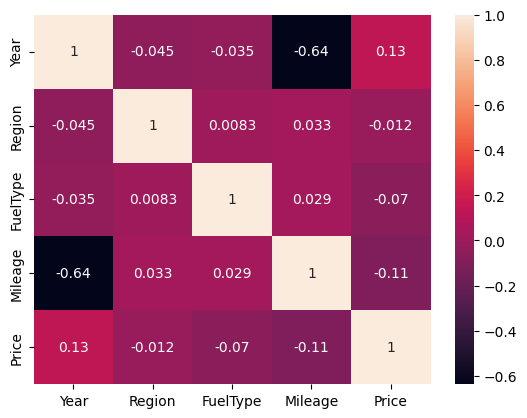

In [34]:
# correlation of each column
import seaborn as sns
corr = df.corr()
sns.heatmap(corr,annot=True)

# Training Data

In [35]:
# getting dependent and independent variables
X = df.drop(['Price'],axis=1)
y = df['Price']

In [14]:
# checking the shapes
print('Shape of X: ',X.shape)
print('Shape of y: ',y.shape)


Shape of X:  (7995, 4)
Shape of y:  (7995,)


In [15]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

# Checking the shapes
print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (6396, 4)
Shape of X_test:  (1599, 4)
Shape of y_train:  (6396,)
Shape of y_test:  (1599,)


In [36]:
# import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression

# call the regressor
reg = LinearRegression()

# fit the regressor to the training data
reg = reg.fit(X_train,y_train)

# Testing Data

In [37]:
# Apply the regressor/model to the test data
y_pred = reg.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test,y_pred)
print('Mean squared error of testing set:', mse)

# Calculating MAE, lower the value better it is. 0 means perfect prediction
mae = mean_absolute_error(y_test,y_pred)
print('Mean absolute error of testing set:', mae)

# Calculating RMSE, lower the value better it is. 0 means perfect prediction
rmse = np.sqrt(mse)
print('Root mean squared error of testing set:', rmse)


Mean squared error of testing set: 0.0013044693856696685
Mean absolute error of testing set: 0.018095261859708656
Root mean squared error of testing set: 0.036117438802739994


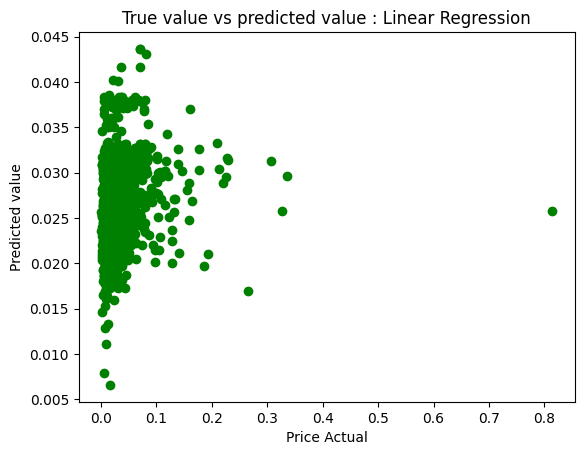

In [18]:
#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()